# Exploring `SpatialData` objects using `napari`

tbd

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [33]:
import spatialdata as sd
import spatialdata_plot as sdp
import napari_spatialdata as nsd
import pandas as pd

for p in [sd, sdp, nsd]:
    print(f"{p.__name__}: {p.__version__}")

sdata_visium = sd.read_zarr("../data/visium.zarr")

spatialdata: 0.2.2
spatialdata_plot: 0.2.5
napari_spatialdata: 0.5.2.post1


In [13]:
nsd.Interactive(sdata_visium)

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
2024-08-29 15:22:51.165 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
2024-08-29 15:22:51.166 | INFO     | napari_spatialdata._view:_on_layer_update:339 - Updating layer.
Traceback (most recent call last):
  File "/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/napari/_qt/widgets/qt_viewer_dock_widget.py", line 230, in keyPressEvent
    return self._ref_qt_viewer().keyPressEvent(event)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/napari/_qt/qt_viewer.py", line 1263, in keyPressEvent
    self.canvas._backend._keyEvent(self.canvas.events.key_press, event)
  File "/Users/tim.treis/anacon

INFO     Rasterizing image for faster rendering.                                                                   


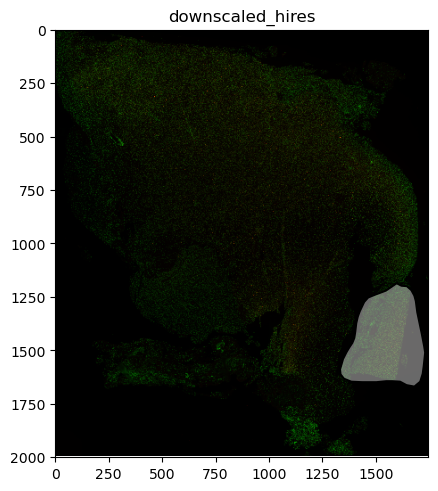

In [15]:
(
    sdata_visium.pl.render_images(
        "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"
    )
    #
    # .pl.render_shapes("CytAssist_FFPE_Protein_Expression_Human_Glioblastoma")
    .pl.render_shapes("hires", outline_alpha=1, contour_px=300, fill_alpha=0.5).pl.show(
        "downscaled_hires"
    )
)

## Use the annotated shape to extract a subpopulation

SpatialData object
├── Images
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 483, 398)
├── Shapes
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (246, 2) (2D shapes)
│     ├── 'hires': GeoDataFrame shape: (1, 1) (2D shapes)
│     └── 'my_selection': GeoDataFrame shape: (1, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (246, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes), hires (Shapes), my_selection (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)


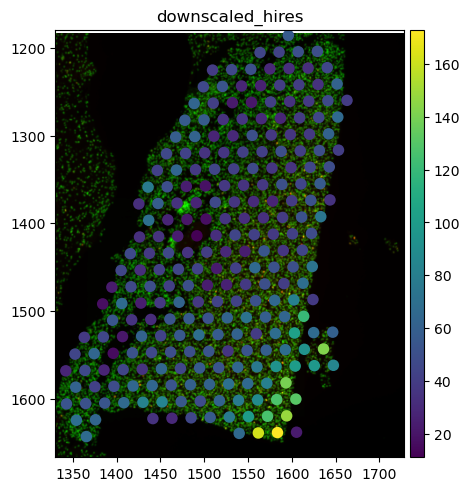

In [32]:
from spatialdata import polygon_query

polygon = sdata_visium["hires"].geometry.iloc[0]
filtered_sdata = polygon_query(
    sdata_visium, polygon=polygon, target_coordinate_system="downscaled_hires"
)
print(filtered_sdata)
filtered_sdata.pl.render_images().pl.render_shapes(
    element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
    color="MT-CO2",
).pl.show("downscaled_hires")

## Use the subpopulation to annotate the original data

In [43]:
# pd.Categorical(["selected" for _ in range(n)], categories=categories)
# sdata_visium.table.obs["annotation"]

idx_in_selection = filtered_sdata.table.obs.index
idx_in_selection[:3]

/var/folders/qg/qgc908995g3fc8qtss2fsbhhxyxxj4/T/ipykernel_21139/1269327975.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  idx_in_selection = filtered_sdata.table.obs.index


Index(['AACCAATCCGATCGCT-1', 'AACCATAAGCTCGACT-1', 'AACGCTCAGGCCAGCT-1'], dtype='object')

In [49]:
sdata_visium.table.obs["annotation"] = "out_of_selection"

sdata_visium.table.obs.loc[idx_in_selection, "annotation"] = "selected"

/var/folders/qg/qgc908995g3fc8qtss2fsbhhxyxxj4/T/ipykernel_21139/252040430.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata_visium.table.obs["annotation"] = "out_of_selection"
/var/folders/qg/qgc908995g3fc8qtss2fsbhhxyxxj4/T/ipykernel_21139/252040430.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata_visium.table.obs.loc[idx_in_selection, "annotation"] = "selected"


INFO     Rasterizing image for faster rendering.                                                                   


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/basic.py:889: UserWarning: Converting copy of 'annotation' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:786: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


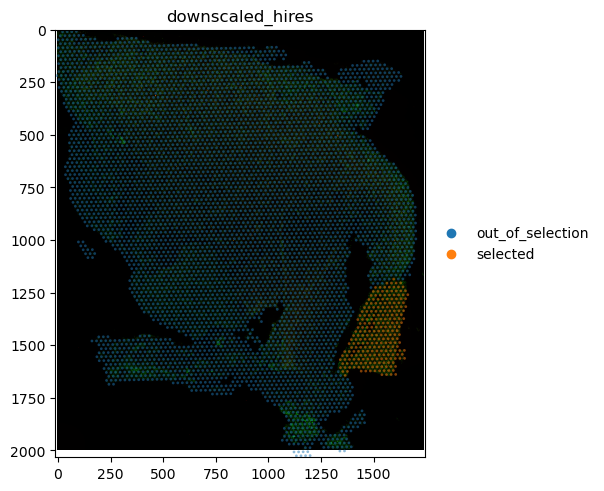

In [52]:
sdata_visium.pl.render_images().pl.render_shapes(
    element="CytAssist_FFPE_Protein_Expression_Human_Glioblastoma",
    color="annotation",
    fill_alpha=0.5,
).pl.show("downscaled_hires")